In [21]:
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt

import h5py
import tables

import sys
sys.path.append('/scratch9/mkron/software/DeepIceLearning/Plots')
#import plot_functions_mk as pfmk
from fancy_plot_mk import *

fancy_plot_mk.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib64/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib64/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/ga38tul/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ga38tul/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/ga38tul/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/lib64/python2.7/site-packages/zmq/eventlo

In [76]:
DATA_DIR = "/scratch9/mkron/data/training_data/third_dataset/small/"
File = "File_105.h5"

file = h5py.File(os.path.join(DATA_DIR, File), "r")

In [77]:
print file.keys()

[u'av_time_charges', u'charge', u'first_charge', u'num_pulses', u'reco_vals', u'time', u'time_05pct', u'time_100pct', u'time_10pct', u'time_15pct', u'time_20pct', u'time_25pct', u'time_30pct', u'time_35pct', u'time_40pct', u'time_45pct', u'time_50pct', u'time_55pct', u'time_60pct', u'time_65pct', u'time_70pct', u'time_75pct', u'time_80pct', u'time_85pct', u'time_90pct', u'time_95pct', u'time_kurtosis', u'time_moment_2', u'time_quartercharge', u'time_spread']


##### to find the DOMs

In [78]:
event = 77 #93, 101, 126, 140, 160
x = 6
y = 8
z = 12

for ii in xrange(200):
    event = ii
    waveform_DOM = []
    time = "05"
    for i in xrange(20):
        #print time
        key = "time_" + str(time) + "pct"
        #print key
        waveform_DOM.append(file[key][event][x][y][z][0])
        time = (i+2)*5
    sum = np.sum(waveform_DOM)
    #print sum
    if sum!= 0:
        print ii
        print sum

37
221635.581048
126
212561.099847
138
244581.805206
159
219243.300138
162
216255.184952
171
225105.503019


##### Plotting the Waveform

In [79]:
event = 77 #93, 101, 126, 140, 160
x = 6
y = 10
z = 12


waveform_DOM = []
time = "05"
for i in xrange(20):
    #print time
    key = "time_" + str(time) + "pct"
    #print key
    waveform_DOM.append(file[key][event][x][y][z][0])
    time = (i+2)*5
waveform_DOM = np.array(waveform_DOM)
waveform_DOM = waveform_DOM-np.min(waveform_DOM)

In [80]:
waveform_DOM_2 = waveform_DOM_1
waveform_DOM_1 = waveform_DOM

Text(0,0.5,u'percentage of accumulated charge [pct]')

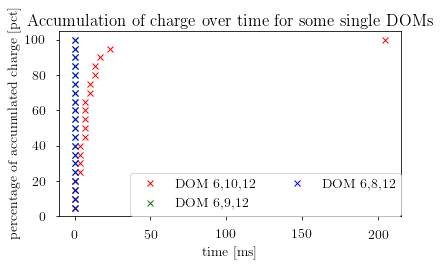

In [81]:
fig, ax1 = newfig(1.0)

x = np.linspace(5,100,20)
ax1.plot(waveform_DOM_2, x, "x" , label="DOM 6,10,12")
ax1.plot(waveform_DOM_1, x, "x" , label="DOM 6,9,12")
ax1.plot(waveform_DOM, x, "x" , label="DOM 6,8,12")
ax1.legend(loc="best", ncol=2, borderaxespad=0.) #loc ='best'
ax1.set_title(r"Accumulation of charge over time for some single DOMs")
ax1.set_xlabel(r'time [ms]')
ax1.set_ylabel(r'percentage of accumulated charge [pct]')


In [83]:
time_05 = file["time_05pct"][207]
time_05 = time_05.flatten()
#print len(time_05)
for i in time_05:
    if i != 0:
        print i

10370.5061651
10615.8698295
10300.0114435
10181.5661692
10144.4067165
10030.2578917
9999.27594165
9939.03465994
9915.65348112
9957.2952252
10002.7282227
10053.2492385
10103.4327299
10223.4580096
10608.3252002
10568.4147624
10913.3295928
10756.8859526
11481.7086737
10947.1076902
11394.9467132
11067.1259726
10943.3194349
11079.6779315
11257.5809347
10587.0704601
11134.305728
10464.7025721
10426.5310592
10478.2516821
10560.0359411
10498.9743153
10568.071561
10575.9802415
11621.4484918
12815.4017725
11414.9688269
11612.4200146
11557.2006493
11181.085062
12004.3201508
11910.2552031
12590.4428132
12390.073583
13136.2700313
11448.4853527
11072.8631175
11032.3728079
10739.6064525
10479.6375364
10687.5942856
10529.1401414
10510.143229
10527.4911301
11149.5833993
10977.448686
11404.4975485
10997.2186619
11333.9562302
10991.371885
12067.6170374
10775.6566885
10832.9138096
10611.3900562
10758.3976686
10925.651153
11075.9566722
10948.9023613
11267.9883515
12007.3673853
12970.4284361
11553.2850748
1